# [Dataset Here:](https://drive.google.com/file/d/1_3sEwoQ-J7nhfqEjBt1kD_f1ktKaFjQc/view?usp=sharing)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Wholesale customers data.csv')
pd.options.display.max_columns = None

df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
sc = StandardScaler()
scaled_data = sc.fit_transform(df)

# KMeans

C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

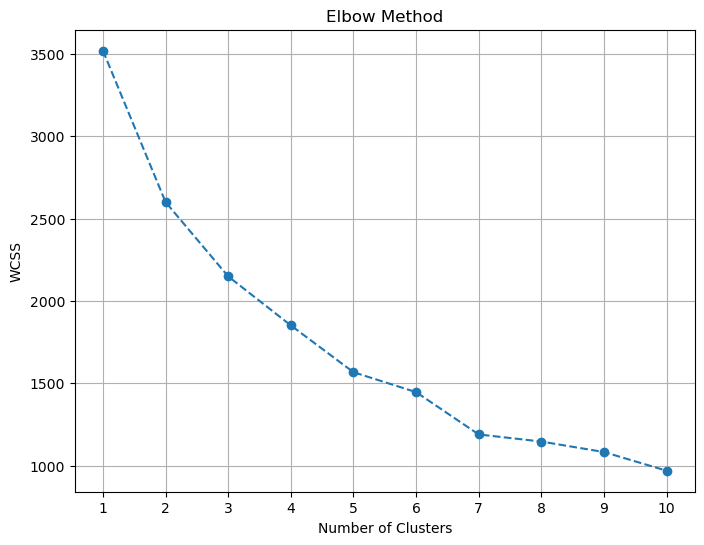

In [9]:
wcss = [] #within cluster sum of squares
for i in range(1, 11): # trying clusters from 1 to 10
    kmeans =  KMeans(n_clusters= i, n_init = 'auto', random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
# Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()        
        

# PCA on KMeans

In [10]:
pca = PCA(n_components = 0.99, random_state = 42)
pca.fit(scaled_data)

PCA(n_components=0.99, random_state=42)

In [11]:
transformed_data = pca.transform(scaled_data)

In [12]:
transformed_data[:10]

array([[ 0.84393893, -0.51535075, -0.76763222, -0.0442148 , -0.44623405,
        -0.93944129,  0.65476177],
       [ 1.06267645, -0.48460126, -0.67297526,  0.40137178, -0.13045815,
        -0.86722684,  0.51102248],
       [ 1.26914052,  0.68205455, -0.6640946 ,  1.63495276, -1.19381302,
        -1.07844165, -0.20315184],
       [-1.05678239,  0.6108215 , -0.50565445,  0.19600495,  0.45785461,
         0.11695882, -0.31380387],
       [ 0.63403048,  0.97419884, -0.77120882,  0.18637413, -0.81387739,
        -1.50537241, -0.16039894],
       [ 0.5301109 , -0.58541138, -0.75862459,  0.24700875, -0.3788392 ,
        -1.07255387,  0.65856234],
       [ 0.39956024, -0.84634288, -0.77755246, -0.20696307, -0.1668782 ,
        -1.19917041,  0.03631217],
       [ 0.79116565, -0.46114017, -0.69660865,  0.48140348, -0.26155495,
        -1.09495488, -0.09240248],
       [-0.66383113, -0.57746545, -0.57448788,  0.21493143, -0.07809964,
         0.66109085, -0.08369595],
       [ 2.1506848 , -0.6179

In [13]:
pca.components_

array([[ 4.28291564e-01,  2.47260253e-02, -2.53194580e-02,
         4.74409947e-01,  5.36329145e-01, -2.99745579e-02,
         5.23906297e-01,  1.64996527e-01],
       [-2.04698855e-01,  4.31296430e-02,  5.13444679e-01,
         2.05540611e-01, -8.71761988e-03,  5.92745252e-01,
        -1.21083091e-01,  5.33180819e-01],
       [-8.29798863e-02, -9.82500889e-01, -8.89509074e-02,
         2.57510842e-02,  4.53143572e-02,  1.22156522e-01,
         4.74814388e-02, -9.30199386e-04],
       [ 2.96441646e-02,  7.78446249e-02, -7.98475924e-01,
         5.40220237e-02, -1.21586244e-01,  1.61316883e-01,
        -1.51012112e-01,  5.37557669e-01],
       [-3.62058452e-02,  1.32508923e-01, -2.58116864e-01,
        -7.20857633e-02,  1.11729898e-01,  7.54212444e-01,
         1.76502639e-01, -5.44827208e-01],
       [-8.63506696e-01,  8.97647905e-02, -1.47474736e-01,
         3.15932560e-01,  2.13698887e-01, -1.94359931e-01,
         1.95753557e-01, -5.45328898e-02],
       [ 1.39899044e-01, -2.327993

# Hierarical clustering

In [14]:
agg_clustering = AgglomerativeClustering(n_clusters = None, distance_threshold =0).fit(scaled_data)


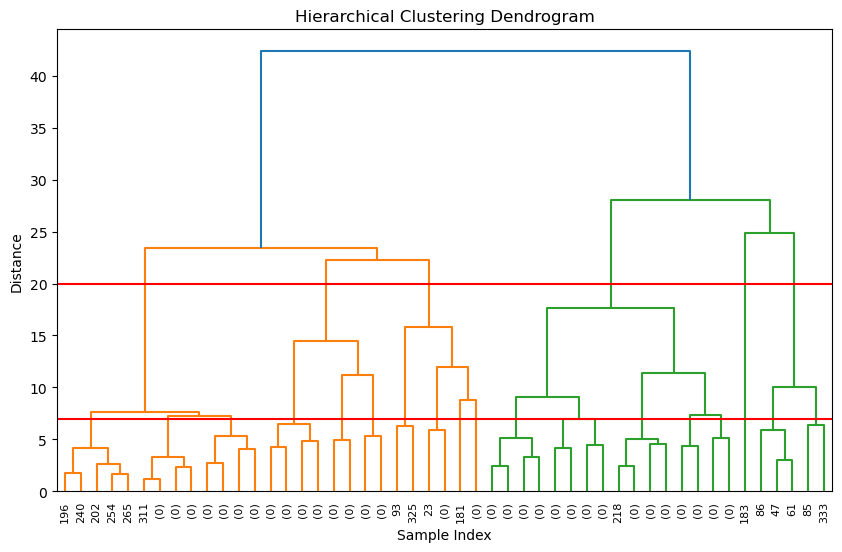

In [15]:
def plot_dendrogram(model, **kwargs):
    linkage_matrix = np.column_stack([model.children_, model.distances_, np.zeros(model.distances_.shape[0])]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg_clustering, truncate_mode='level', p=5)
plt.hlines(20, 0, 10000, 'r')
plt.hlines(7, 0, 10000, 'r')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show() 

# DBSCAN

In [17]:
db = DBSCAN(eps = 0.5, min_samples = 3).fit(scaled_data)

In [18]:
clusters = db.fit_predict(scaled_data)

In [24]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

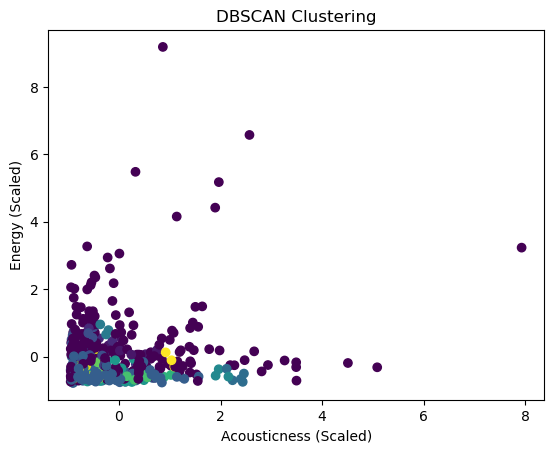

In [25]:
plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c=clusters, cmap='viridis')
plt.xlabel('Acousticness (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()

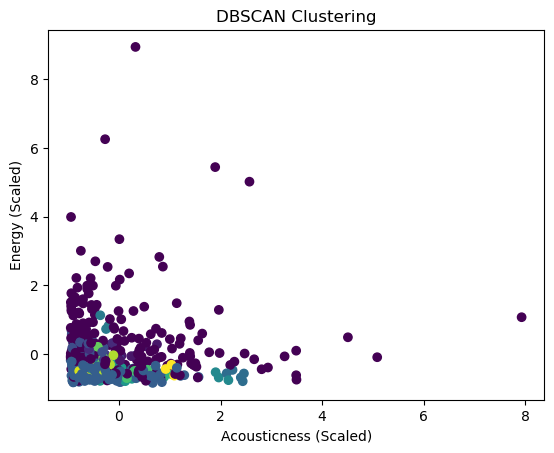

In [29]:
plt.scatter(scaled_data[:, 2], scaled_data[:,4], c=clusters, cmap='viridis')
plt.xlabel('Acousticness (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()

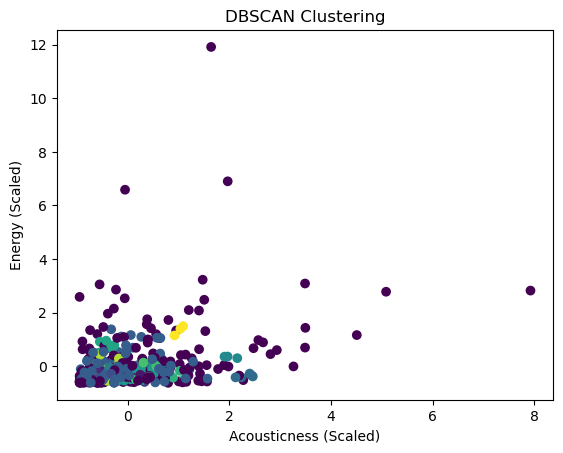

In [30]:
plt.scatter(scaled_data[:, 2], scaled_data[:,5], c=clusters, cmap='viridis')
plt.xlabel('Acousticness (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()

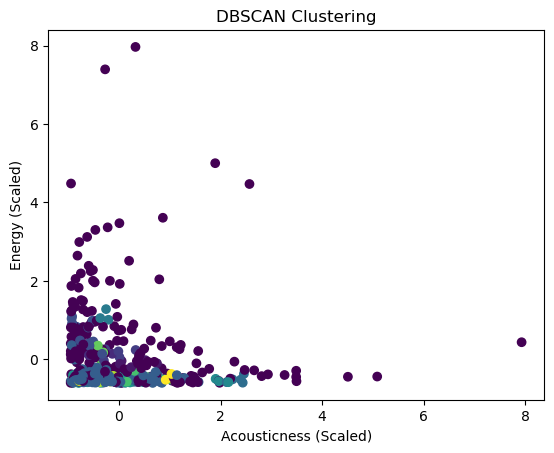

In [31]:
plt.scatter(scaled_data[:, 2], scaled_data[:,6], c=clusters, cmap='viridis')
plt.xlabel('Acousticness (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()

In [34]:
db = DBSCAN(eps = 0.3, min_samples = 5).fit(scaled_data)
clusters = db.fit_predict(scaled_data)

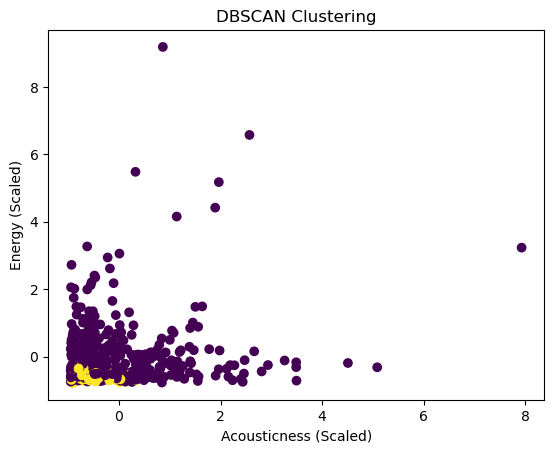

In [35]:
plt.scatter(scaled_data[:, 2], scaled_data[:,3], c=clusters, cmap='viridis')
plt.xlabel('Acousticness (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()

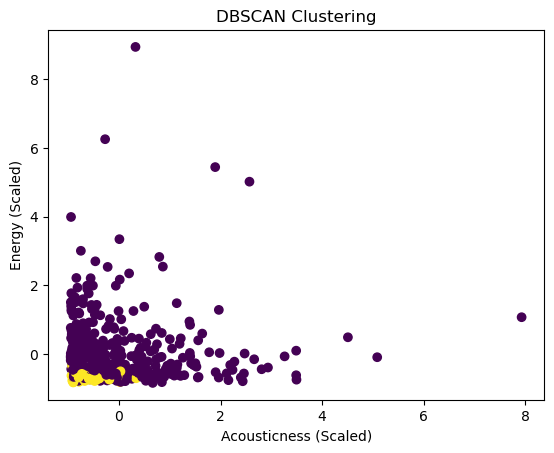

In [36]:
plt.scatter(scaled_data[:, 2], scaled_data[:,4], c=clusters, cmap='viridis')
plt.xlabel('Acousticness (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()

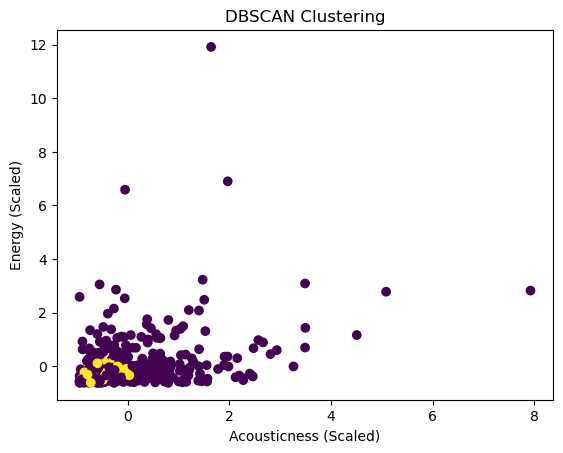

In [37]:
plt.scatter(scaled_data[:, 2], scaled_data[:,5], c=clusters, cmap='viridis')
plt.xlabel('Acousticness (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()

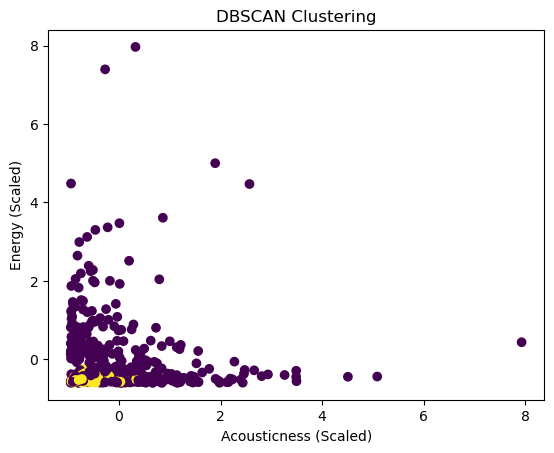

In [38]:
plt.scatter(scaled_data[:, 2], scaled_data[:,6], c=clusters, cmap='viridis')
plt.xlabel('Acousticness (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()

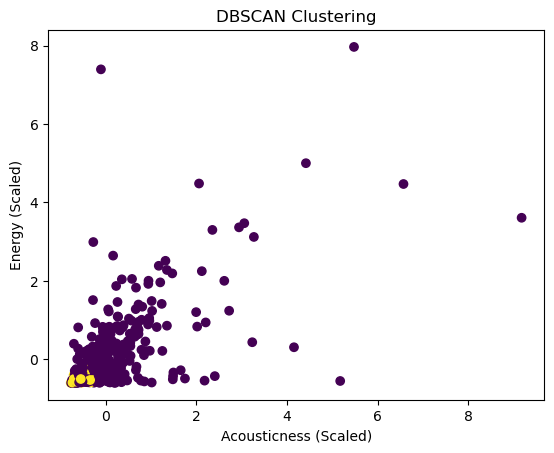

In [39]:
plt.scatter(scaled_data[:, 3], scaled_data[:,6], c=clusters, cmap='viridis')
plt.xlabel('Acousticness (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()